In [ ]:
#references
'''
1. https://scipy.github.io/devdocs/generated/scipy.spatial.voronoi_plot_2d.html 
2. https://chrisalbon.com/machine_learning/model_evaluation/nested_cross_validation/
3. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
5. https://github.com/daltyboy11/Voronoi-Diagram/blob/master/Voronoi_with_knn.py
6. http://csiu.github.io/blog/update/2017/04/17/day52.html
'''

In [11]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
import pandas as pd
from sklearn import datasets
from scipy.spatial import Voronoi, voronoi_plot_2d


def rmse(y1,y2):
    return ((sum((y1-y2)**2))/len(y1))**0.5

In [3]:
data = datasets.load_iris()

In [4]:
df=pd.DataFrame(data.data, columns=data.feature_names)
df[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [6]:
X=np.array(df[['sepal length (cm)', 'sepal width (cm)']])
y=data.target
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
[X_train.shape, X_test.shape, y_train.shape, y_test.shape]

[(112, 2), (38, 2), (112,), (38,)]

/usr/lib/python3/dist-packages/scipy/spatial/_plotutils.py:17: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()
/usr/lib/python3/dist-packages/scipy/spatial/_plotutils.py:19: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(True)
/usr/lib/python3/dist-packages/scipy/spatial/_plotutils.py:22: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(was_held)


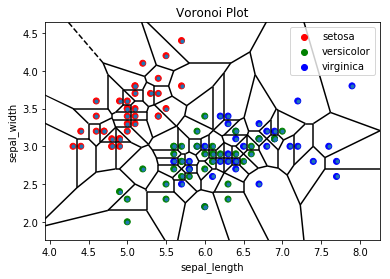

In [30]:
vor = Voronoi(X_train)
voronoi_plot_2d(vor, show_vertices=0, show_points=0)
my_colors = ["r", "g", "b"]

p=plt.scatter(x=X_train[:,0],y=X_train[:,1],c=y_train,cmap=matplotlib.colors.ListedColormap(my_colors))
## Add titles
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title("Voronoi Plot")


## Add legend
plt.legend((p,p,p), (data.target_names))
ax = plt.gca()
legend = ax.get_legend()
legend.legendHandles[0].set_color(my_colors[0])
legend.legendHandles[1].set_color(my_colors[1])
legend.legendHandles[2].set_color(my_colors[2])

plt.show()


We can infer from here that the datapoints belonging to the class setosa are pretty seperated but data belonging the other two classes are pretty mixed and hence the knn model learned would be a complex function